In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

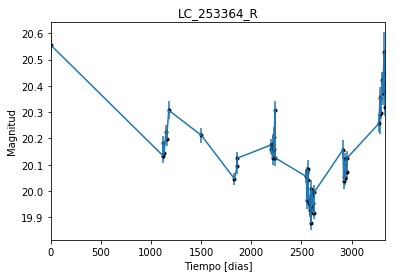

In [2]:
data = np.genfromtxt('LC_253364_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_253364_R')
plt.savefig("LC_253364_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

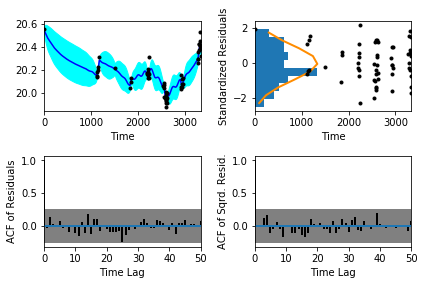

In [5]:
sample.assess_fit()

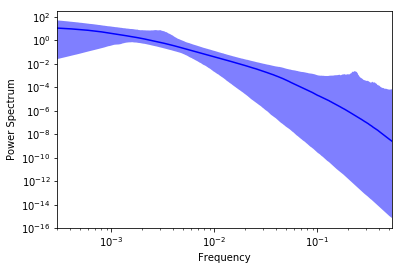

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

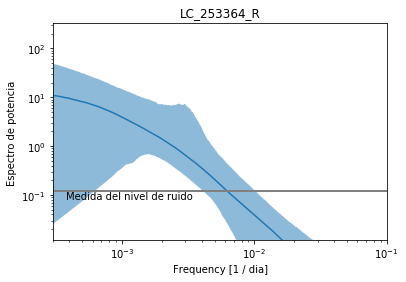

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_253364_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_253364_R')

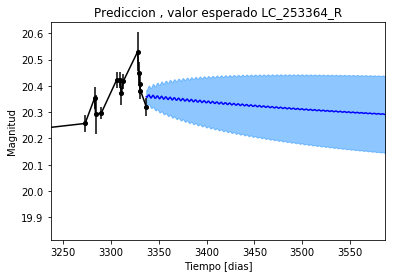

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_253364_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_253364_R')

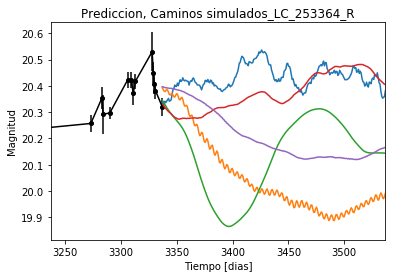

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_253364_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


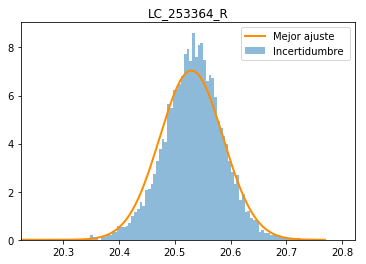

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_253364_R')
plt.savefig("Mejor_ajuste_LC_253364_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_253364_R')

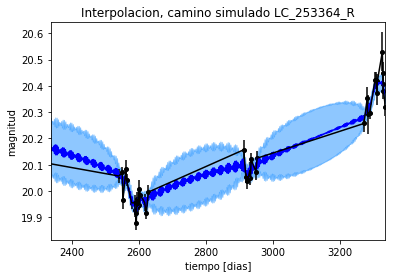

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_253364_R')

Text(0.5,1,'Interpolacion, camino simulado LC_253364_R')

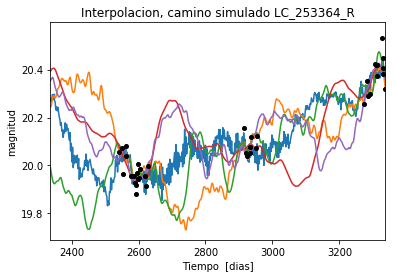

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_253364_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 697.310339034
Median: 0.0136453181772
Standard deviation: 0.182705517949
68% credibility interval: [ 0.00119472  0.14540356]
95% credibility interval: [  3.83703215e-04   7.32088481e-01]
99% credibility interval: [  3.19328224e-04   9.90954250e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1069.13142959
Median: 0.00580610591835
Standard deviation: 0.0989581873203
68% credibility interval: [ 0.0006998  0.0614043]
95% credibility interval: [ 0.00033668  0.28759128]
99% credibility interval: [  3.06947837e-04   7.40423334e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 810.705951858
Median: 0.0446010184652
Standard de

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 401.258002276
Median: 103.608234505
Standard deviation: 1.80606967491
68% credibility interval: [ 101.79977025  105.08137876]
95% credibility interval: [  99.36650961  106.72803599]
99% credibility interval: [  97.34329549  108.02001176]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 394.781905795
Median: 0.989896519178
Standard deviation: 2.26137306406
68% credibility interval: [ 0.12694838  4.16728333]
95% credibility interval: [ 0.02108237  7.79040766]
99% credibility interval: [  0.01129238  10.94588359]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 502.852736639
Median: 1.92492269835
Standard deviation: 11.0000424496
68% credibility interval: [  0.07065237  16.85778753]
95% credibility interval: [  1.31990406

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1089.53488013
Median: 2.38064152563e-16
Standard deviation: 7.17098792967e+136
68% credibility interval: [  3.39738885e-89   2.78352621e+20]
95% credibility interval: [  1.38457310e-134   2.63801348e+129]
99% credibility interval: [  1.99049210e-143   9.98510101e+135]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1648.76497859
Median: 20.2211414981
Standard deviation: 0.0850066696574
68% credibility interval: [ 20.15381903  20.30800833]
95% credibility interval: [ 20.0817847   20.42080877]
99% credibility interval: [ 20.01052778  20.49991996]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 430.251479533
Median: 0.127927947835
Standard deviation: 0.286872254172
68% credibility interval: [ 0.          0.59467512]
95% credibility interval: [ 0.          0.95992768]
99% credibility interval: [ 0.          1.03928022]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 430.251479533
Median: 0.127927947835
Standard deviation: 0.286872254172
68% credibility interval: [ 0.          0.59467512]
95% credibility interval: [ 0.          0.95992768]
99% credibility interval: [ 0.          1.03928022]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 845.083628438
Median: 0.0
Standard deviation: 0.000761924848153
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 401.258002276
Median: 103.608234505
Standard deviation: 1.80606967491
68% credibility interval: [ 101.79977025  105.08137876]
95% credibility interval: [  99.36650961  106.72803599]
99% credibility interval: [  97.34329549  108.02001176]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2254.51044834
Median: 0.0293932584087
Standard deviation: 0.0242730053463
68% credibility interval: [ 0.01883229  0.05033294]
95% credibility interval: [ 0.01305672  0.09598981]
99% credibility interval: [ 0.01051273  0.15183501]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 455.237787007
Median: 1.34799013232
Standard deviation: 0.252800108566
68% credibility interval: [ 1.08836541  1.60442312]
95% credibility interval: [ 0.86242206  1.85554423]
99% credibility interval: [ 0.75650637  1.95860863]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 260.715816358
Median: 0.00153390301332
Standard deviation: 0.233375443914
68% credibility interval: [  2.10612470e-23   6.19379761e-02]
95% credibility interval: [  1.04300344e-130   5.66686609e-001]
99% credibility interval: [  8.75684710e-140   1.50043970e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 697.310339034
Median: (-0.0857360626828-1.72340447598j)
Standard deviation: 2.13699433204
68% credibility interval: [-0.91359749-1.10640671j -0.00750667-0.69030445j]
95% credibility interval: [ -4.59984759e+00+0.j          -2.41087840e-03-0.04684807j]
99% credibility interval: [ -6.22634919e+00+0.j          -2.00639841e-03-0.53288671j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1069.13142959
Median: (-0.0364808393981+1.32616024625j)
Standard deviation: 1.90669998347
68% credibility interval: [-0.38581461+0.42799431j -0.00439697+0.47698465j]
95% credibility interval: [-1.80698932+2.95076435j -0.00211543+0.00870761j]
99% credibility interval: [ -4.65221702e+00+5.30347841j  -1.92861014e-03+0.j        ]
Posterior summ